<a href="https://colab.research.google.com/github/Priyanshu27083/ML_lab/blob/main/ML_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees on IRIS Dataset

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Default Model
default_tree = DecisionTreeClassifier(random_state=42)
default_tree.fit(X_train, y_train)
y_pred_default = default_tree.predict(X_test)
default_acc = accuracy_score(y_test, y_pred_default)



## A **hyperparameter** is a setting that the machine learning engineer, must choose and set manually before the model starts training. I have used different parameters like criterion, splitter, max_depth, min_samples_split

In [4]:
# Hyperparameter Tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 3, 4, 5]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
best_acc = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", best_acc)

Best Model Accuracy: 1.0


# New Section

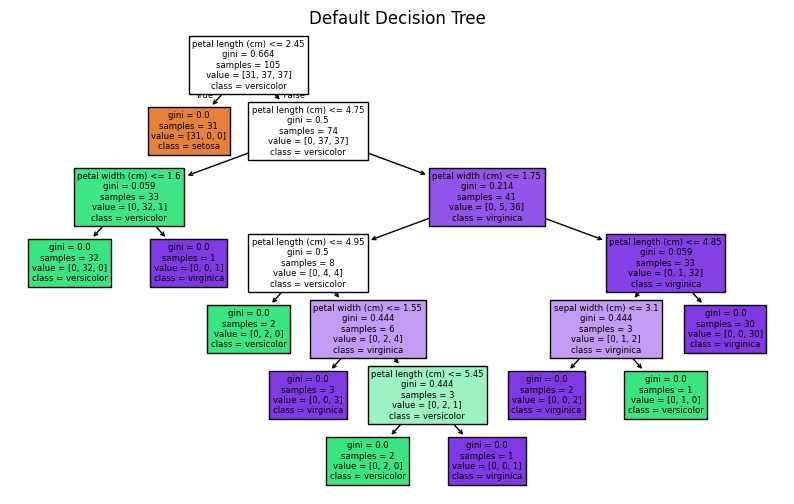

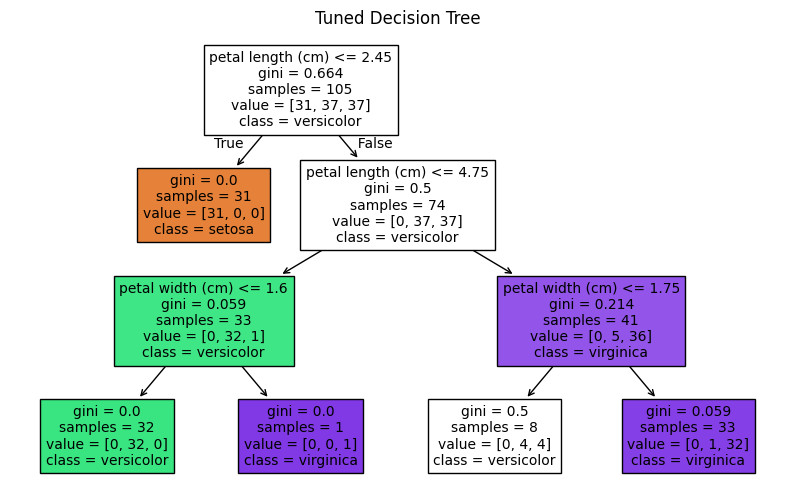

In [17]:
# Decision Tree before tuning
plt.figure(figsize=(10, 6))
plot_tree(default_tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Default Decision Tree")
plt.show()

# Decision Tree after tuning
plt.figure(figsize=(10, 6))
plot_tree(best_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Tuned Decision Tree")
plt.show()




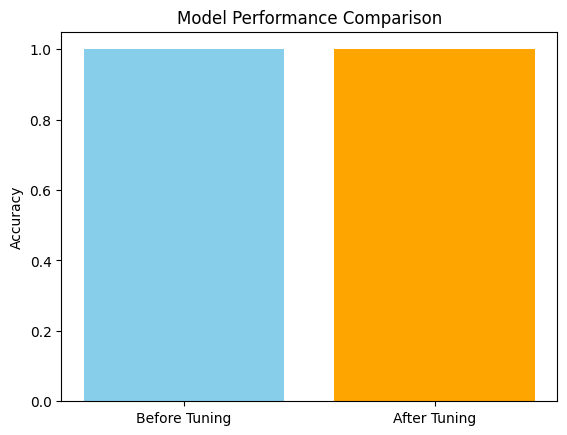

In [16]:
# Accuracy comparison
plt.bar(['Before Tuning', 'After Tuning'], [default_acc, best_acc], color=['skyblue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.show()

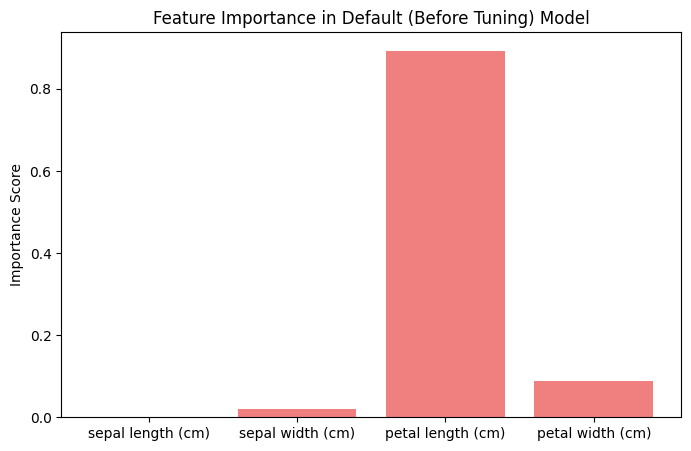

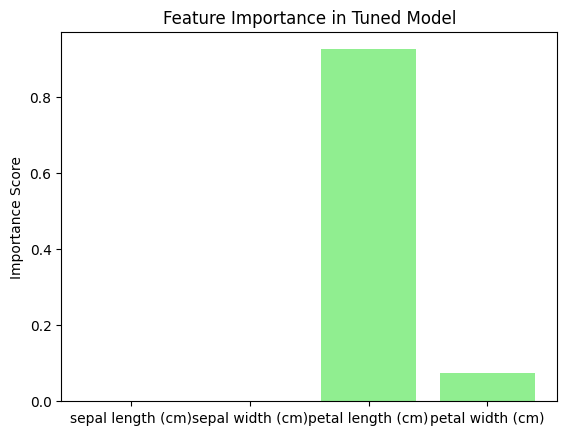

In [22]:
# Feature Importance BEFORE tuning
importances_default = default_tree.feature_importances_

plt.figure(figsize=(8,5))
plt.bar(iris.feature_names, importances_default, color='lightcoral')
plt.title("Feature Importance in Default (Before Tuning) Model")
plt.ylabel("Importance Score")
plt.show()

# Feature Importance in Tuned Model
importances = best_model.feature_importances_
plt.bar(iris.feature_names, importances, color='lightgreen')
plt.title("Feature Importance in Tuned Model")
plt.ylabel("Importance Score")
plt.show()

In [14]:
# Results
print("Default Accuracy:", default_acc)
print("Best Accuracy after Tuning:", best_acc)
print("\nBest Parameters:", grid.best_params_)
print("\nClassification Report (Tuned Model):\n", classification_report(y_test, y_pred_best, target_names=iris.target_names))

Default Accuracy: 1.0
Best Accuracy after Tuning: 1.0

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'splitter': 'best'}

Classification Report (Tuned Model):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

